In [12]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [13]:
class AgentState(TypedDict):
    n1 : int
    n2 : int
    n3 : int
    n4 : int
    op1 : str
    op2 : str
    res1 : int
    res2 : int

In [14]:
def add1(state: AgentState) -> AgentState:
    state["res1"] = state["n1"] + state["n2"]
    return state
def sub1(state: AgentState) -> AgentState:
    state["res1"] = state["n1"] - state["n2"]
    return state

def add2(state: AgentState) -> AgentState:
    state["res2"] = state["n3"] + state["n4"]
    return state
def sub2(state: AgentState) -> AgentState:
    state["res2"] = state["n3"] - state["n4"]
    return state

def router1(state: AgentState):
    if state["op1"] == "+":
        return "add_edge_1"
    elif state["op1"] == "-":
        return "sub_edge_1"
def router2(state: AgentState):
    if state["op2"] == "+":
        return "add_edge_2"
    elif state["op2"] == "-":
        return "sub_edge_2"

In [22]:
graph = StateGraph(AgentState)

graph.add_node("add1", add1)
graph.add_node("add2", add2)
graph.add_node("sub1", sub1)
graph.add_node("sub2", sub2)

graph.add_node("router1", lambda state : state)
graph.add_node("router2", lambda state : state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    router1,
    {
        "add_edge_1" : "add1",
        "sub_edge_1" : "sub1"
    }
)
graph.add_edge("add1", "router2")
graph.add_edge("sub1", "router2")

graph.add_conditional_edges(
    "router2",
    router2,
    {
        "add_edge_2" : "add2",
        "sub_edge_2" : "sub2"
    }
)

graph.add_edge("add2", END)
graph.add_edge("sub2", END)

app = graph.compile()

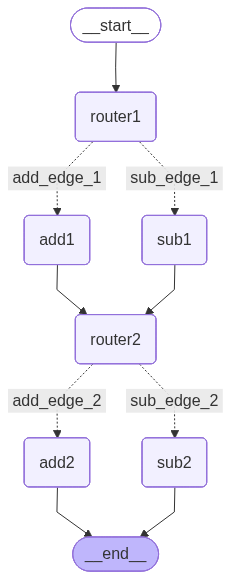

In [23]:
app

In [24]:
app.invoke({"n1" : 1,"n2" : 2,"n3" : 3,"n4" : 4,"op1" : "+","op2" : "-"})

{'n1': 1,
 'n2': 2,
 'n3': 3,
 'n4': 4,
 'op1': '+',
 'op2': '-',
 'res1': 3,
 'res2': -1}